# Machine Learning mit Tensorflow

TensorFlow ist eine Bibliothek von Google, die auf dem "Multilayer Percetion" (MLP)-Framework Keras aufbaut. Multilayer Perception bedeutet, dass das Ergebnis des Algorithmus über mehrere sog. hidden layer und die darin enthaltenen Neuronen verarbeitet wird. Folgende Abbildung stellt das Verfahren vereinfacht dar:
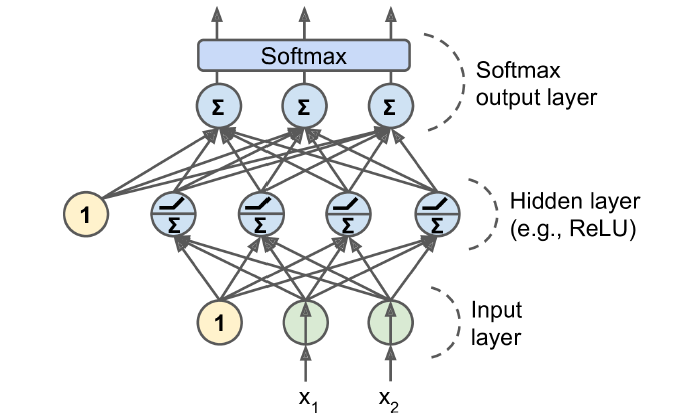

Der einfachste Weg, ein MLP-Netz mit zu trainieren, ist die Verwendung der **API Tensorflow**. Im folgenden Beispiel greifen wir auf einen vereinfachten Datensatz der Hauspreisdaten in Kalifornien zurück, der konstenlos über *sklearn.datasets* zur Verfügung gestellt wird. Der folgende Code trainiert beispielsweise ein neuronales Netz mit zwei verborgenen Schichten (keras.layers.Dense). eine Schicht hat 10 Neuronen und die andere wird mit 5 Neuronen bestückt. Da es sich um ein lineares Regressionsproblem handelt, gibt es nur ein Ausgabeneuron, dass den geschätzten (skalierten) Hauspreis wieder gibt.

In [92]:
import tensorflow as tf
import tf.keras as keras
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Beschaffung einer vereinfachten Form der Hauspreisdaten
housing = fetch_california_housing()

# Aufteilung der Daten in Trainings und Testdaten
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

# Aufteilung der Trainingsdaten in Trainings und Validierungsdaten für Modelltraining
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

#Skalierung der Datensätze
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

# Konfiguration des Neuronalen Netzes (hier unter Nutzung der Sequential API)
model = keras.models.Sequential([keras.layers.Dense(10, activation="relu", input_shape = X_train.shape[1:]),
                                 keras.layers.Dense(5),
                                 keras.layers.Dense(1)
                                ])
# Modellberechnung mit Fehlerfunktion und Optimierer als Parameter
model.compile(loss="mean_squared_error", optimizer="sgd")
history= model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Testen des Modells. Die Accurray ist in Prozent angegeben
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

print("mse: ",mse_test)



Min:  0    0.14999
dtype: float64
Max:  0    5.00001
dtype: float64
Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 122us/sample - loss: 0.9988 - val_loss: 0.5747
Epoch 2/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.6947 - val_loss: 0.4979
Epoch 3/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5159 - val_loss: 0.4345
Epoch 4/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4784 - val_loss: 0.4175
Epoch 5/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4604 - val_loss: 0.4202
Epoch 6/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4483 - val_loss: 0.4752
Epoch 7/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4376 - val_loss: 0.4788
Epoch 8/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4301 - val_loss: 0.4949
Epoch 9/20
11610/11610 [==

**Aufgabe 1:** Verändern Sie die Hyperparameter. Wie verändert sich der MSE Ausgabewert? 
**Aufgabe 2:** Fügen Sie zwei neue Neuronen zu Ihrem Netz hinzu und prüfen Sie erneut die Ausgaben.